<a href="https://colab.research.google.com/github/egy1st/denmune-clustering-algorithm/blob/main/colab/MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import time
import os.path

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# then import it
from denmune import DenMune

In [5]:
# clone datasets from our repository datasets
if not os.path.exists('datasets'):
  !git clone https://github.com/egy1st/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 52 (delta 8), reused 49 (delta 8), pack-reused 0
Unpacking objects: 100% (52/52), done.


Plotting dataset Groundtruth


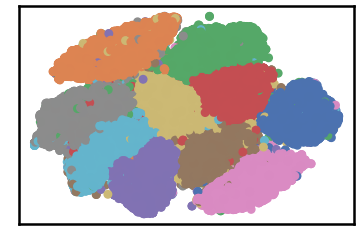

Plotting train data


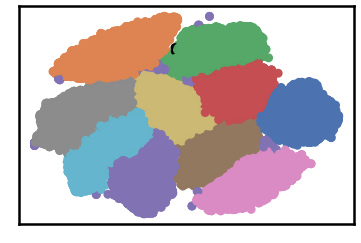

Validating train data
├── exec_time
│   ├── DenMune: 340.29
│   ├── NGT: 15.154
│   └── t_SNE: 0
├── n_clusters
│   ├── actual: 10
│   └── detected: 10
├── n_points
│   ├── dim: 784
│   ├── noise
│   │   ├── type-1: 2
│   │   └── type-2: 0
│   ├── plot_size: 42000
│   ├── size: 70000
│   ├── strong: 38267
│   └── weak
│       ├── all: 31733
│       ├── failed to merge: 0
│       └── succeeded to merge: 31733
└── validity
    └── train
        ├── ACC: 40564
        ├── AMI: 0.913
        ├── ARI: 0.926
        ├── F1: 0.966
        ├── NMI: 0.913
        ├── completeness: 0.913
        └── homogeneity: 0.913

Plotting test data


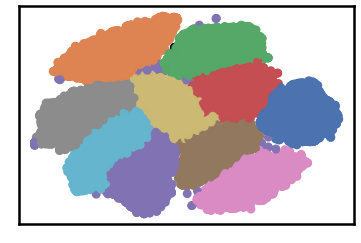

In [7]:
data_path = 'datasets/denmune/mnist/'  
file_2d = data_path + 'mnist-2d.csv'

X_train = pd.read_csv(data_path + 'train.csv', sep=',')
X_test = pd.read_csv(data_path + 'test.csv',  sep=',')
y_train = X_train['label']
X_train = X_train.drop(['label'], axis=1)

dm = DenMune(train_data=X_train,
             train_truth=y_train,
             test_data=X_test, 
             k_nearest=93,
             file_2d=file_2d,
             rgn_tsne=False)

labels, validity = dm.fit_predict(show_noise=True, show_analyzer=True)


In [ ]:
# prepare our output to be submitted to the dataset kaggle competition
ImageID = np.arange(len(X_test))+1
Out = pd.DataFrame([ImageID,labels['test']]).T
Out.to_csv('submission.csv', header =  ['ImageId', 'Label' ], index = None)
